In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import warnings
from post_processing_multi import * # Import data post processing functions
from plotting_helper import * # Import helper functions for plotting in ipynb
warnings.filterwarnings('ignore') # supress warnings for clenliness

# Loading data
Data is provided in a folder (or series of folders) and is loaded and processed with budget assignment by the ```load_multiple_files_budget``` function. This is wrapped in the load_max_cut_data. This takes a long time due to the large number of files that needs to be processed. If data were stored differently (i.e. in a database), this would be much faster. 

In [2]:

if Path("./MaxCut_runs/filtered_dfk.pkl").is_file():
    maxcut_df=pd.read_pickle('./MaxCut_runs/filtered_df.pkl') 
else:
    maxcut_df = load_all_data() #Only load data from files if there is no database
    maxcut_df.to_pickle('./MaxCut_runs/filtered_df.pkl') 
    maxcut_df.to_csv('./MaxCut_runs/filtered_df.csv')


Qubit: 4, depth: 0, budget:0
Qubit: 4, depth: 0, budget:5
Qubit: 4, depth: 0, budget:6
Qubit: 4, depth: 0, budget:7
Qubit: 4, depth: 0, budget:8
Qubit: 4, depth: 0, budget:9
Qubit: 4, depth: 0, budget:10

Qubit: 6, depth: 0, budget:0
Qubit: 6, depth: 0, budget:5
Qubit: 6, depth: 0, budget:6
Qubit: 6, depth: 0, budget:7
Qubit: 6, depth: 0, budget:8
Qubit: 6, depth: 0, budget:9
Qubit: 6, depth: 0, budget:10

Qubit: 8, depth: 0, budget:0
Qubit: 8, depth: 0, budget:5
Qubit: 8, depth: 0, budget:6
Qubit: 8, depth: 0, budget:7
Qubit: 8, depth: 0, budget:8
Qubit: 8, depth: 0, budget:9
Qubit: 8, depth: 0, budget:10

Qubit: 10, depth: 0, budget:0
Qubit: 10, depth: 0, budget:5
Qubit: 10, depth: 0, budget:6
Qubit: 10, depth: 0, budget:7
Qubit: 10, depth: 0, budget:8
Qubit: 10, depth: 0, budget:9
Qubit: 10, depth: 0, budget:10


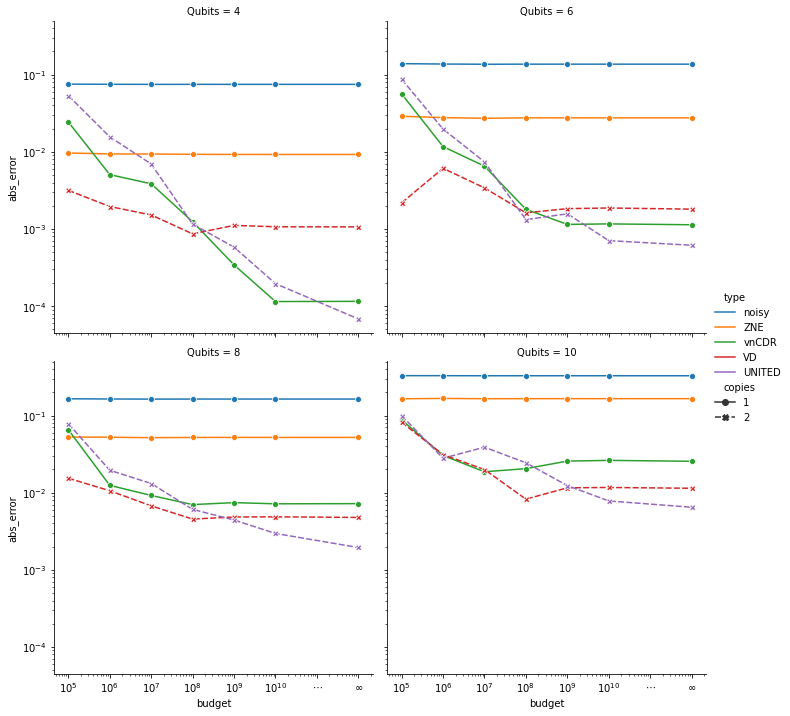

In [14]:
plot_over_budget(maxcut_df)

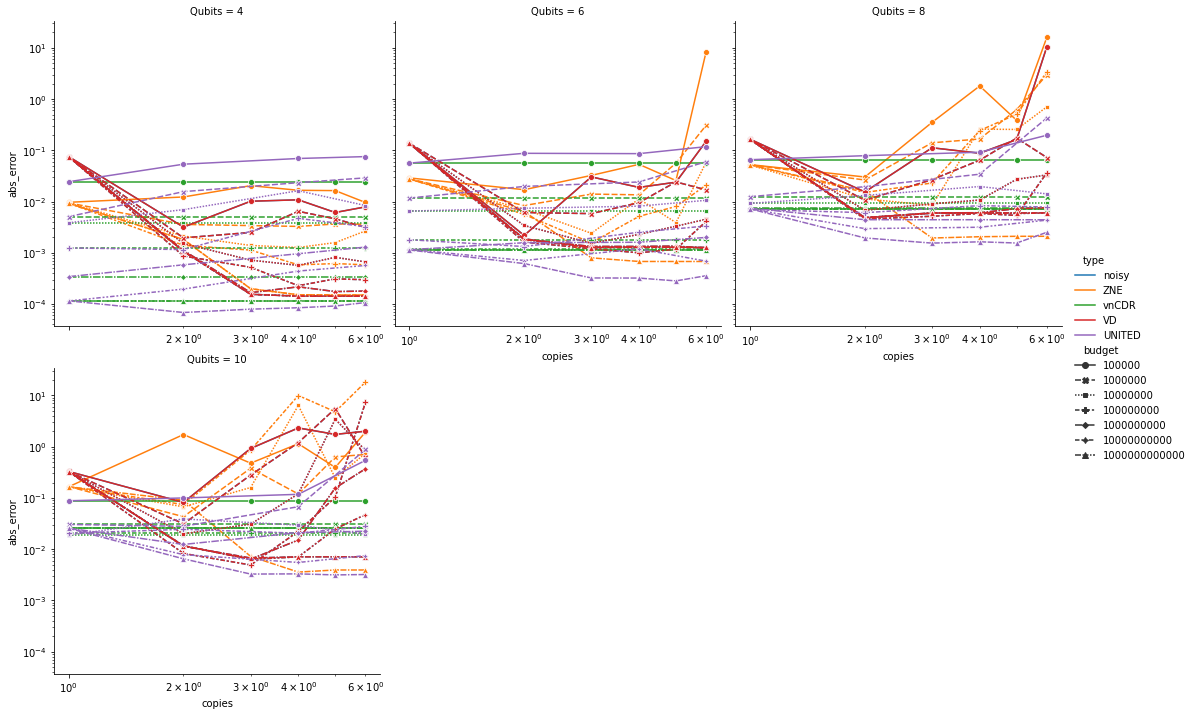

In [35]:
df=maxcut_df
zero_copy_methods = df.query(
    'abs_error > 0   & nlsp==1 & description == "3nlsp_full" & res_type=="abs_error" & ( type == "ZNE" | type == "vnCDR")'
)
noisy = df.query(
    'abs_error > 0   & nlsp==1 & description == "3nlsp_full" & res_type=="abs_error" & ( type=="VD")'
)
few_copy_methods = df.query(
    'abs_error >  0  & nlsp==1  & description == "3nlsp_full" & res_type=="abs_error" & ( type=="VD")'
)
many_copy_methods = df.query(
    'abs_error > 0  &nlsp==1  & description == "3nlsp_full" & res_type=="abs_error" & ( type=="UNITED")'
)
noisy["type"] = "noisy"
plot_df = pd.concat(
    [noisy, zero_copy_methods, few_copy_methods, many_copy_methods],
    axis=0,
    ignore_index=True,
)
fig = sns.relplot(
    data=plot_df.reset_index(),
    kind="line",
    x="copies",
    y="abs_error",
    hue="type",
    col="Qubits",
    row='budget',
    estimator="mean",
    markers=True,
    ci=None,
).set(yscale="log", xscale="log")

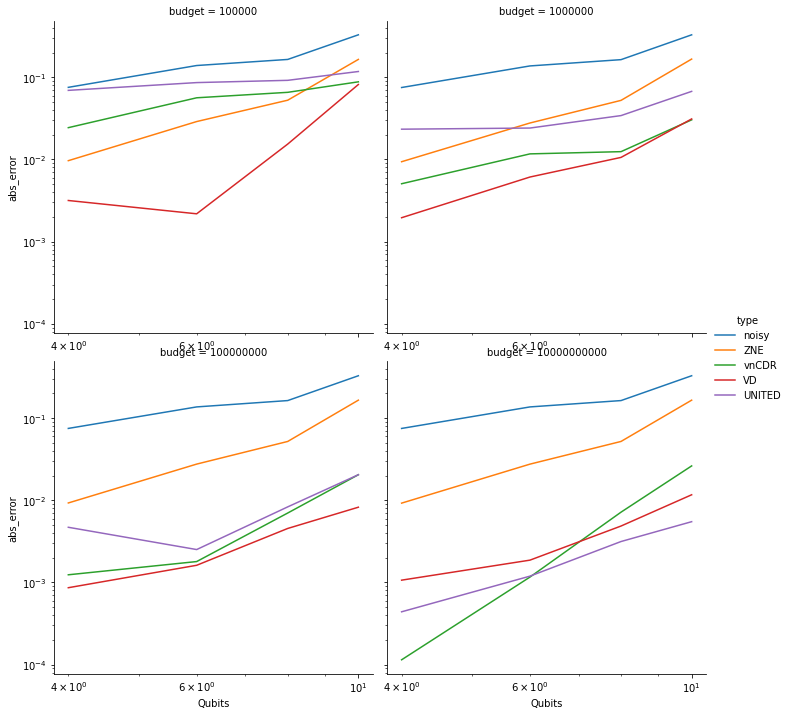

In [16]:
df = maxcut_df.query('budget>0&budget<10**11&budget!=10**9&budget!=10**7')
zero_copy_methods = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1 & description == "3nlsp_full" & res_type=="abs_error" & ( type == "ZNE" | type == "vnCDR")'
)
noisy = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1 & description == "3nlsp_full" & res_type=="abs_error" & ( type=="VD")'
)
few_copy_methods = df.query(
    'abs_error >  0  & nlsp==1 & copies==2 & description == "3nlsp_full" & res_type=="abs_error" & ( type=="VD")'
)
many_copy_methods = df.query(
    'abs_error > 0  &nlsp==1  & copies==4& description == "3nlsp_full" & res_type=="abs_error" & ( type=="UNITED")'
)
noisy["type"] = "noisy"
plot_df = pd.concat(
    [noisy, zero_copy_methods, few_copy_methods, many_copy_methods],
    axis=0,
    ignore_index=True,
)
fig = sns.relplot(
    data=plot_df.reset_index(),
    kind="line",
    x="Qubits",
    col='budget',
    col_wrap=2,
    y="abs_error",
    hue="type",
    estimator="mean",
    markers=True,
    ci=None,
).set(yscale="log", xscale='log')

In [28]:
fig3 = plot_df.groupby(['type','Qubits','budget','copies']).aggregate('max').reset_index().drop(['copies','nlsp','depth'],axis=1).reset_index()


In [29]:
fig3.to_csv('./plot_dataframes/fig2_MaxCut_MAX.csv')

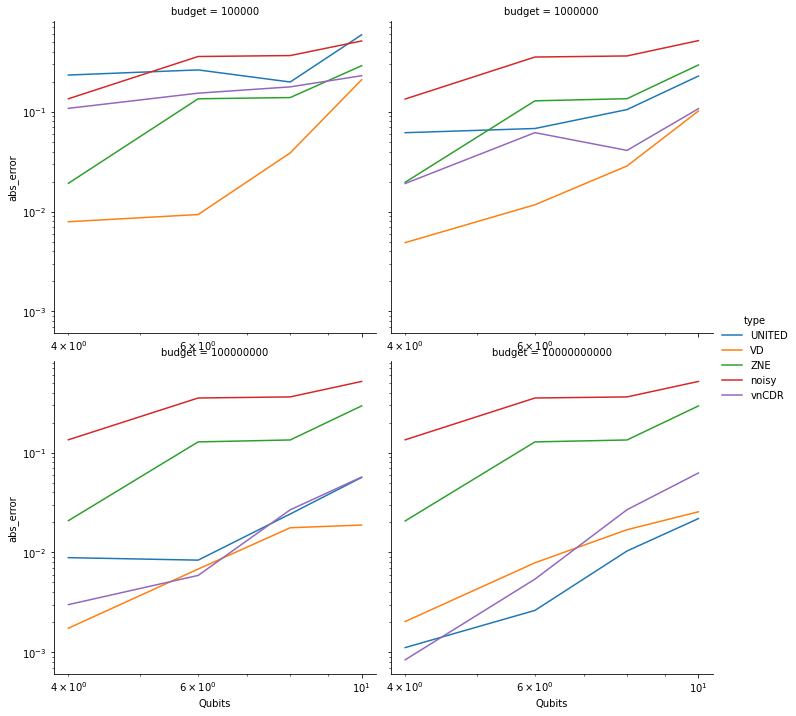

In [30]:
fig = sns.relplot(
    data=fig3.reset_index(),
    kind="line",
    x="Qubits",
    col='budget',
    col_wrap=2,
    y="abs_error",
    hue="type",
    estimator="mean",
    markers=True,
    ci=None,
).set(yscale="log", xscale='log')

In [5]:
import os 
dir_path = 'RQC_runs/all_qubits/'
res = []
for file in os.listdir(dir_path):
    if file.endswith('.pkl'):
        res.append(pd.read_pickle(dir_path+file))
res = pd.concat(res)

In [6]:
res

expectation exact
result_type tag      shots nlsp seed qubits copies                  
train       _LinGrow NaN   1    0    6      1        -0.882719  -1.0
                                            1        -0.908045  -1.0
                                            1         0.884048   1.0
                                            1        -0.877442  -1.0
                                            1         0.890289   1.0
...                                                        ...   ...
                           3    29   6      6              0.0   0.0
                                            6              0.0   0.0
                                            6              0.0   0.0
                                            6              0.0   0.0
                                            6              0.0   0.0

[381780 rows x 2 columns]

In [82]:
import os 
dir_path = 'RQC_runs/all_qubits/'
res = []
for file in os.listdir(dir_path):
    if file.endswith('.pkl') and file.startswith("pandas_train"):
        res.append(pd.read_pickle(dir_path+file).assign(file=file))
res = pd.concat(res)

In [83]:
res

expectation exact  \
result_type tag      shots nlsp seed qubits copies                     
train       _LinGrow NaN   1    0    6      1        -0.882719  -1.0   
                                            1        -0.908045  -1.0   
                                            1         0.884048   1.0   
                                            1        -0.877442  -1.0   
                                            1         0.890289   1.0   
...                                                        ...   ...   
                           3    29   6      6              0.0   0.0   
                                            6              0.0   0.0   
                                            6              0.0   0.0   
                                            6              0.0   0.0   
                                            6              0.0   0.0   

                                                                                  file  
result_type tag      shots nlsp seed qubits copies                                      
train       _LinGrow NaN   1    0    6      1        pandas_train_Q6p6N10Nts100MC6.pkl  
                                            1        pandas_train_Q6p6N10Nts100MC6.pkl  
                                            1        pandas_train_Q6p6N10Nts100MC6.pkl  
                                            1        pandas_train_Q6p6N10Nts100MC6.pkl  
                                            1        pandas_train_Q6p6N10Nts100MC6.pkl  
...                                                                                ...  
                           3    29   6      6       pandas_train_Q6p96N10Nts100MC6.pkl  
                                            6       pandas_train_Q6p96N10Nts100MC6.pkl  
                                            6       pandas_train_Q6p96N10Nts100MC6.pkl  
                                            6       pandas_train_Q6p96N10Nts100MC6.pkl  
                                            6       pandas_train_Q6p96N10Nts100MC6.pkl  

[378000 rows x 3 columns]

In [84]:
res = res.reset_index().query('copies==1 & nlsp==1')
res = res.drop(['shots','result_type','copies'],axis=1)

In [85]:
res["exact"] = pd.to_numeric(res['exact'])
res["expectation"] = pd.to_numeric(res['expectation'])

In [90]:
res.groupby('file')['expectation'].aggregate('std')

file
pandas_train_Q10p10N10Nts100MC6.pkl    0.189070
pandas_train_Q4p4N10Nts100MC6.pkl      0.335975
pandas_train_Q4p64N10Nts100MC6.pkl     0.020366
pandas_train_Q6p6N10Nts100MC6.pkl      0.268663
pandas_train_Q6p96N10Nts100MC6.pkl     0.000535
pandas_train_Q8p128N10Nts100MC6.pkl    0.000003
pandas_train_Q8p8N10Nts100MC6.pkl      0.235265
Name: expectation, dtype: float64

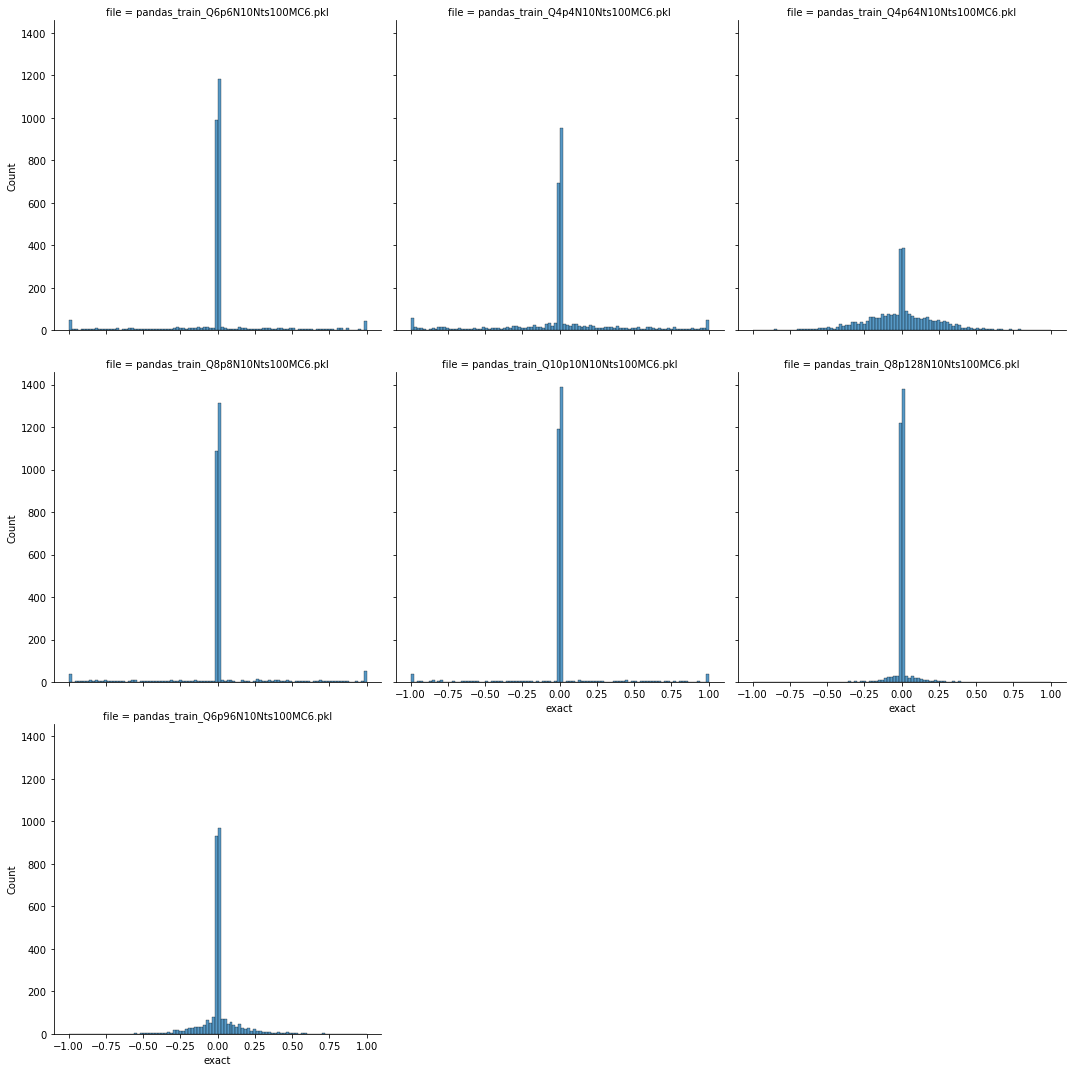

In [91]:
sns.displot(data=res,x='exact',col='file',col_wrap=3,bins=100)

In [36]:
res

,tag,nlsp,seed,qubits,expectation,exact,file
0,_LinGrow,1,0,8,-2.500023e-06,-0.002443,pandas_COI_Q8p128N10Nts100MC6.pkl
18,_LinGrow,1,1,8,8.354128e-07,0.069345,pandas_COI_Q8p128N10Nts100MC6.pkl
36,_LinGrow,1,2,8,7.705807e-06,0.067918,pandas_COI_Q8p128N10Nts100MC6.pkl
54,_LinGrow,1,3,8,-2.094368e-06,-0.107033,pandas_COI_Q8p128N10Nts100MC6.pkl
72,_LinGrow,1,4,8,-3.796838e-06,-0.066552,pandas_COI_Q8p128N10Nts100MC6.pkl
...,...,...,...,...,...,...,...
3690,_LinGrow,1,25,6,6.335319e-02,0.078039,pandas_COI_Q6p6N10Nts100MC6.pkl
3708,_LinGrow,1,26,6,-1.065230e-01,-0.142461,pandas_COI_Q6p6N10Nts100MC6.pkl
3726,_LinGrow,1,27,6,-6.567365e-02,-0.083359,pandas_COI_Q6p6N10Nts100MC6.pkl
3744,_LinGrow,1,28,6,1.305504e-01,0.129732,pandas_COI_Q6p6N10Nts100MC6.pkl
